In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

## Get data for total us population

#### CASES

In [2]:
normalization_factor = 5000000

In [3]:
# GET TOTAL NEW CASES FOR US
cases_full = pd.read_csv('../data/Covid/covid_confirmed_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
cases_only = cases_full.iloc[:,4:]
cases_only = cases_only.sum() 
cases_only_new = cases_only.diff()[1:]
cases_only_new = cases_only_new.astype('int')
new_cases = cases_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_cases_normalized = new_cases_non.apply(lambda x: (x/population)*normalization_factor)

#### DEATHS

In [4]:
# GET TOTAL NEW CASES FOR US
deaths_full = pd.read_csv('../data/Covid/covid_deaths_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
deaths_only = deaths_full.iloc[:,4:]
deaths_only = deaths_only.sum() 
deaths_only_new = deaths_only.diff()[1:]
deaths_only_new = deaths_only_new.astype('int')
new_deaths = deaths_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_deaths_normalized = new_deaths_non.apply(lambda x: (x/population)*normalization_factor)

## Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
- Start your data from the first day of infections in US. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths.  
- Aim to predict 1 week in advance. Use older data to validate your models. Use Root Mean Square Error (RMSE) to see the evaluation.  
- Describe the trends as compared to other countries.

In [5]:
days_since_first_case = []
i = 0
for x in new_cases.index:
    days_since_first_case += [i]
    i+=1

### Cases

In [6]:
arr = np.asarray(days_since_first_case)
reshaped_days_since_first = arr.reshape(-1,1)
X = reshaped_days_since_first
Y = new_cases.values.reshape(-1, 1)

In [7]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regressor.predict(X)

In [9]:
print(regressor.coef_)
print(regressor.intercept_)

[[264.62460006]]
[-3757.55152773]


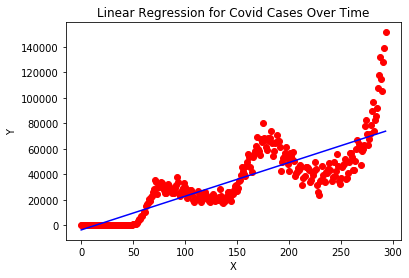

In [10]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.title('Linear Regression for Covid Cases Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
r2_score(Y,y_pred)

0.6837666766438104

### Deaths

In [12]:
X = reshaped_days_since_first
Y = new_deaths.values.reshape(-1, 1)

In [13]:
regressor_d = LinearRegression()
regressor_d.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred_d = regressor_d.predict(X)

In [15]:
print(regressor_d.coef_)
print(regressor_d.intercept_)

[[1.65436691]]
[570.01279834]


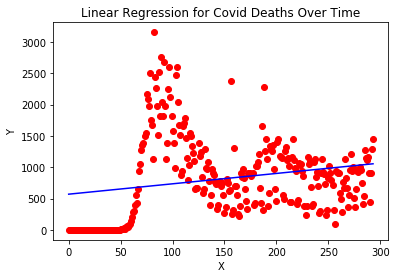

In [16]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred_d,color = 'blue')
plt.title('Linear Regression for Covid Deaths Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
r2_score(Y,y_pred_d)

0.04638834852292917